In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [3]:
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
X=df.drop("quality",axis=1)
y=df.quality

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)

In [8]:
clf= BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)  
#n_estimator: it tries to set the number of decision maker into a bag of baggingclassifer. 

In [9]:
clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [10]:
clf.predict(X_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 7, 7, 5, 5, 6, 6, 5, 6, 7, 7,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 7, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 7, 7, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 7, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 6, 7, 5, 6,
       6, 7, 6, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 7, 5, 6, 5, 5, 6, 5,
       5, 7, 6, 5, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6, 7, 5, 6, 5, 5, 7, 5, 5, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6,

In [11]:
clf.base_estimator_

DecisionTreeClassifier()

In [12]:
clf.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [13]:
clf.estimator_params

()

## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
clf_bag_knn=BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [16]:
clf_bag_knn.fit(X_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=6))

In [17]:
clf_bag_knn.predict(X_test)

array([5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 7, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 7, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5,
       6, 7, 7, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 4, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 7, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 4, 5, 6, 5, 7, 6, 6, 6, 5, 7, 6, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 5, 5, 5, 5,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6,

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf= RandomForestClassifier(n_estimators=5)

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [21]:
rf.score(X_test,y_test)

0.64

In [22]:
clf.score(X_test,y_test)

0.64

In [23]:
clf_bag_knn.score(X_test,y_test)

0.4925

In [24]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=532181397),
 DecisionTreeClassifier(max_features='sqrt', random_state=586147414),
 DecisionTreeClassifier(max_features='sqrt', random_state=668426301),
 DecisionTreeClassifier(max_features='sqrt', random_state=1741689396),
 DecisionTreeClassifier(max_features='sqrt', random_state=199391419)]

In [25]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=532181397)

[Text(0.43238734578362253, 0.975, 'x[4] <= 0.072\ngini = 0.641\nsamples = 740\nvalue = [9, 41, 517, 476, 145, 11]'),
 Text(0.09430924620390456, 0.925, 'x[10] <= 9.95\ngini = 0.666\nsamples = 219\nvalue = [2, 19, 104, 176, 67, 6]'),
 Text(0.028199566160520606, 0.875, 'x[5] <= 22.5\ngini = 0.456\nsamples = 46\nvalue = [2, 5, 55, 16, 0, 0]'),
 Text(0.02386117136659436, 0.825, 'x[5] <= 7.5\ngini = 0.546\nsamples = 35\nvalue = [2, 5, 36, 16, 0, 0]'),
 Text(0.008676789587852495, 0.775, 'x[3] <= 2.35\ngini = 0.117\nsamples = 9\nvalue = [0, 0, 15, 1, 0, 0]'),
 Text(0.004338394793926247, 0.725, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 13, 0, 0, 0]'),
 Text(0.013015184381778741, 0.725, 'x[6] <= 24.0\ngini = 0.444\nsamples = 2\nvalue = [0, 0, 2, 1, 0, 0]'),
 Text(0.008676789587852495, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.01735357917570499, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.039045553145336226, 0.775, 'x[9] <= 0.66\ngini = 0.624

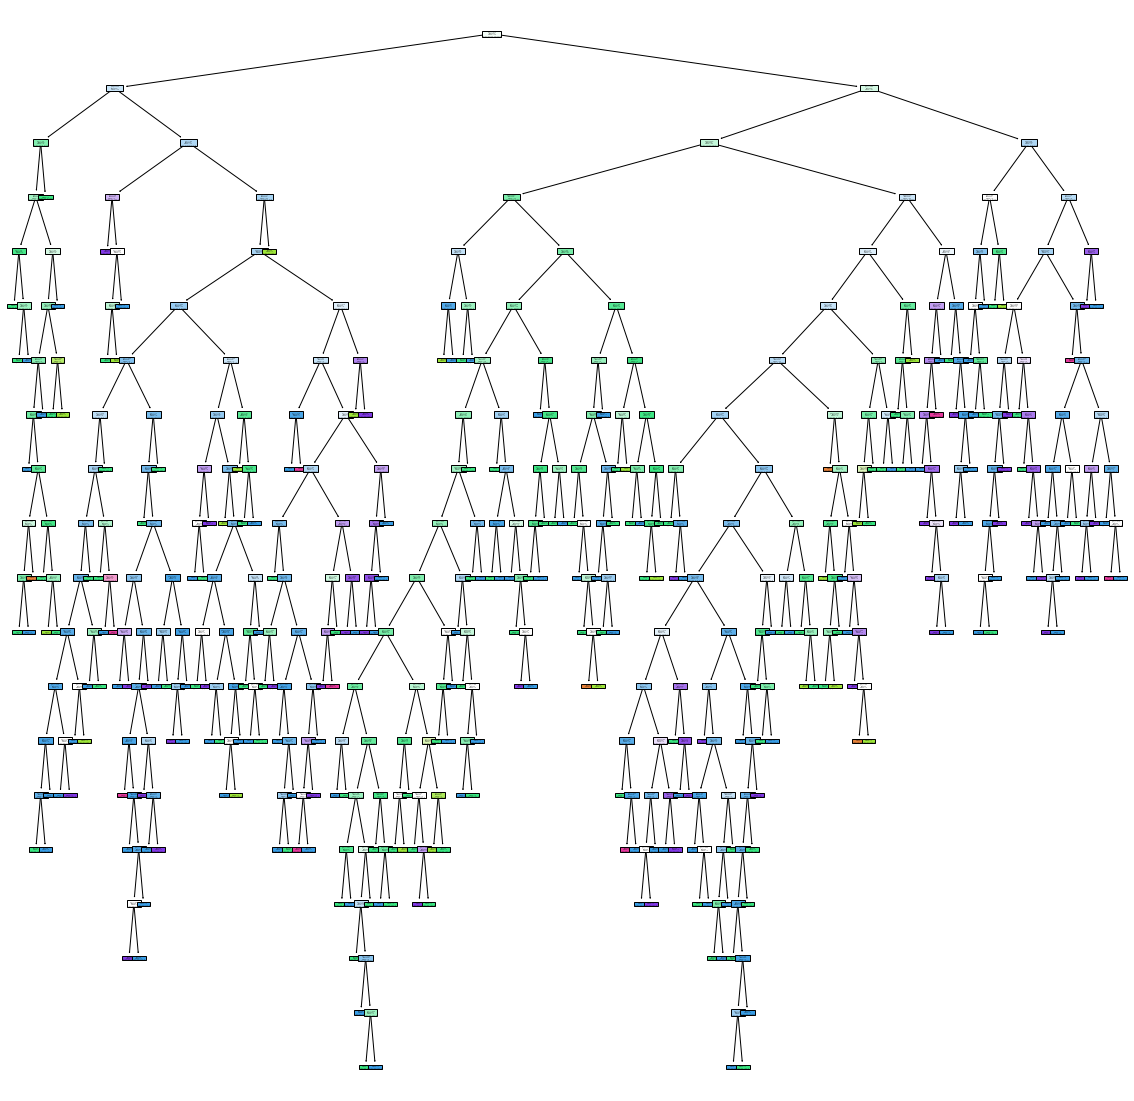

In [26]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(0.628342975144439, 0.9736842105263158, 'x[10] <= 10.525\ngini = 0.65\nsamples = 744\nvalue = [11, 42, 505, 466, 170, 5]'),
 Text(0.48502008606162733, 0.9210526315789473, 'x[3] <= 8.35\ngini = 0.556\nsamples = 470\nvalue = [7, 34, 435, 253, 29, 0]'),
 Text(0.4206901480500722, 0.868421052631579, 'x[6] <= 82.5\ngini = 0.553\nsamples = 463\nvalue = [7, 34, 433, 242, 29, 0]'),
 Text(0.30358539961482905, 0.8157894736842105, 'x[8] <= 3.435\ngini = 0.592\nsamples = 365\nvalue = [7, 28, 293, 222, 29, 0]'),
 Text(0.1425583774675012, 0.7631578947368421, 'x[1] <= 0.375\ngini = 0.6\nsamples = 299\nvalue = [5, 22, 220, 200, 26, 0]'),
 Text(0.04429465575349061, 0.7105263157894737, 'x[2] <= 0.415\ngini = 0.515\nsamples = 52\nvalue = [0, 1, 20, 50, 7, 0]'),
 Text(0.02118440057775638, 0.6578947368421053, 'x[5] <= 11.5\ngini = 0.573\nsamples = 16\nvalue = [0, 1, 10, 12, 1, 0]'),
 Text(0.0077034183919114105, 0.6052631578947368, 'x[10] <= 8.95\ngini = 0.298\nsamples = 7\nvalue = [0, 0, 9, 2, 0, 0]'),

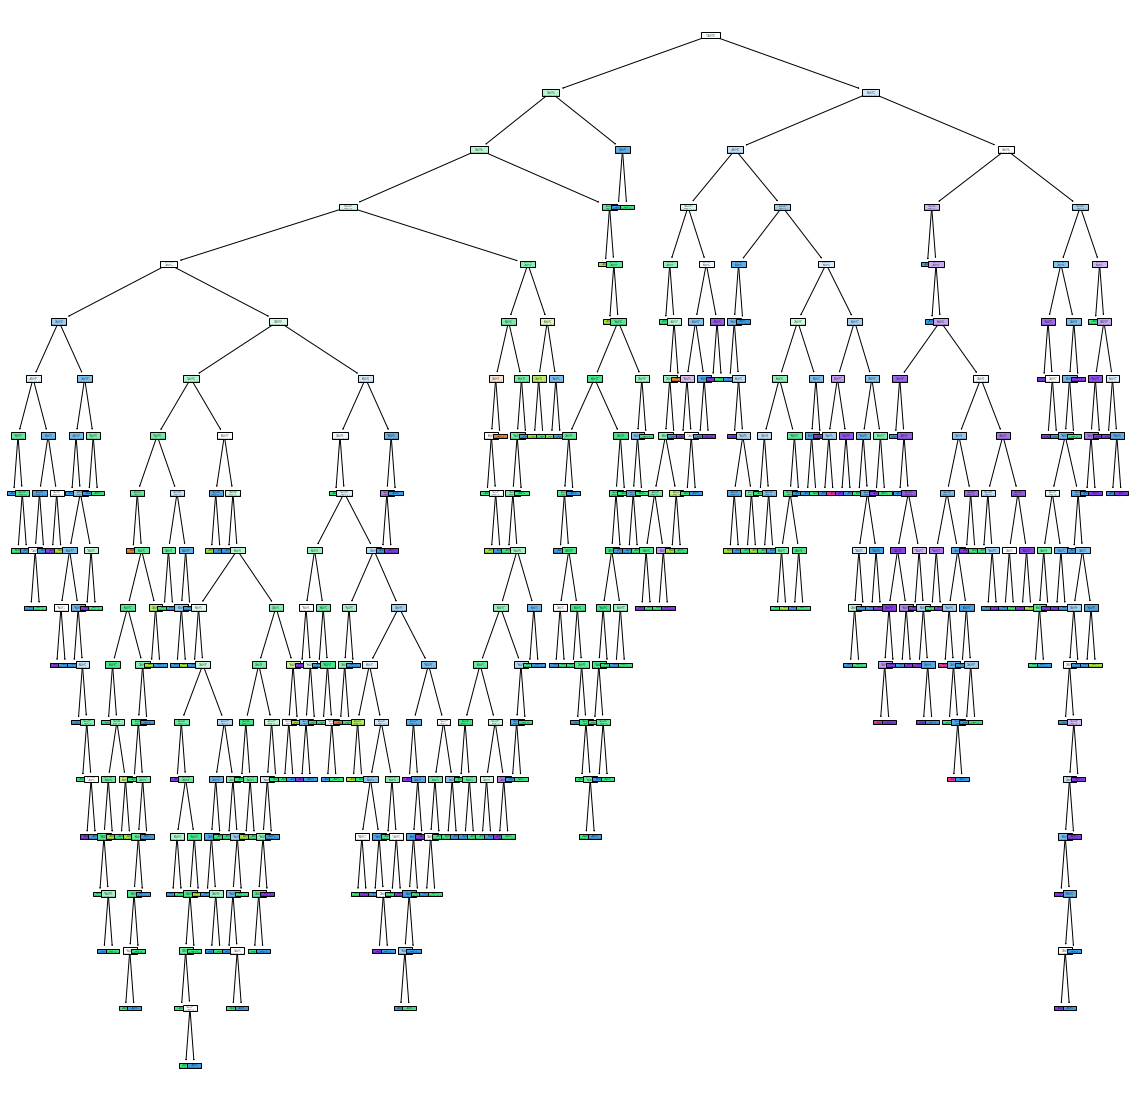

In [27]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1],filled=True)

In [28]:
grid_param={
    "n_estimators":[5,10,50,100,150],
    "criterion":["gini","entropy"],
    "max_depth":range(10),
    "min_samples_leaf":range(10)
}

In [29]:
grid_search_rf=GridSearchCV(param_grid=grid_param,cv=10, n_jobs=-1,verbose=1,estimator=rf)

In [30]:
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 150]},
             verbose=1)

In [31]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [32]:
rf_new=RandomForestClassifier(criterion="entropy",max_depth=9, min_samples_leaf=1, n_estimators=50)

In [33]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [34]:
rf.score(X_test,y_test)

0.6475

Always its not correct that, hyperparameter tuning will increase the accuracy of the model. Its a conceptual thing. That's why we cannot guarantee that hyperparamter tuning will increase the accuracy of the model.

the model accuaracy doesnot impact much, the main thing that matters is stability of the model that doesnot consist of overfitting and underfitting of the model.